# Assignment One: Overinvestment Estimation

### Loading in the Data - Define Null Values

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the files and define na values
na = ['n/a', 'NaN', 'Na', '', ' ', '#NUM!']
finanaical_report_2018 = pd.read_csv('./finanaical_report_2018.csv', na_values=na)
Investment_2019 = pd.read_csv('./Investment_2019.csv', na_values=na)

### Check the number of Null Values

In [2]:
print('Number of null values in finanaical_report_2018 dataset: ', finanaical_report_2018.isnull().sum().sum())
print('Number of null values in Investment_2019 dataset: ', Investment_2019.isnull().sum().sum())

Number of null values in finanaical_report_2018 dataset:  29
Number of null values in Investment_2019 dataset:  2225


### There are a lot of null values within the combined datasets. This will not help the training process so firsty these rows will be dropped, and then the results of both dataframes will be murged.

In [3]:
# Merge datasets
df = pd.merge(finanaical_report_2018, Investment_2019, on='Stock Code')
orig = df.copy()

# Drop rows with null values
df.dropna(inplace=True)

### Descriptive Statistical Summary for all Features:

In [4]:
# Pandas Describe finds statistics for each feature.  
df.describe()

,Stock Code,Market Value of Equity,Total Market Value,Stock Return,Total Investment Expenditure,Amortization and Depreciation,Book Value,Operating Income after Depreciation,Annual Dividends,Leverage,Cash,Age,Size,Investment2019
count,1608.000000,1.608000e+03,1.608000e+03,1608.000000,1.608000e+03,1.608000e+03,1.608000e+03,1.608000e+03,1.608000e+03,1608.000000,1.608000e+03,1608.000000,1608.000000,1.608000e+03
mean,319258.307836,1.011481e+07,1.217905e+07,0.086890,1.383397e+05,8.031822e+04,4.035865e+06,9.009102e+05,2.017992e+05,0.704771,3.648123e+05,1.039133,5.685922,9.834592e+04
std,278043.543570,5.081694e+07,5.181681e+07,0.114959,7.160398e+05,4.546277e+05,2.378772e+07,5.249223e+06,1.319971e+06,0.337467,1.994764e+06,0.420600,0.653644,4.216709e+05
min,8.000000,2.412861e+04,2.412861e+04,-0.482599,3.981221e+02,1.779485e+02,4.825722e+03,9.505385e+02,1.825034e+02,0.130820,1.165412e+02,0.000000,3.242648,-4.211296e+04
25%,2496.750000,1.731945e+06,2.630736e+06,0.033830,2.070882e+04,1.284721e+04,5.547685e+05,1.220998e+05,2.623391e+04,0.407612,5.302042e+04,0.778151,5.308290,1.264886e+04
50%,300500.500000,3.048979e+06,4.257048e+06,0.067640,4.128950e+04,2.411506e+04,1.139894e+06,2.556207e+05,5.311546e+04,0.701765,1.111739e+05,1.176091,5.713625,2.776392e+04
75%,600930.000000,6.596363e+06,8.703023e+06,0.116711,8.827524e+04,5.056585e+04,2.519621e+06,5.670891e+05,1.167895e+05,0.999125,2.363989e+05,1.361728,6.080715,6.443588e+04
max,900956.000000,1.486082e+09,1.486082e+09,1.863174,2.035932e+07,1.448930e+07,6.538761e+08,1.575841e+08,4.239013e+07,1.284980,5.431630e+07,1.518514,8.509901,1.025493e+07


### Exploring All Features - Distribution Plots for all Features:

### Market Value of Equity

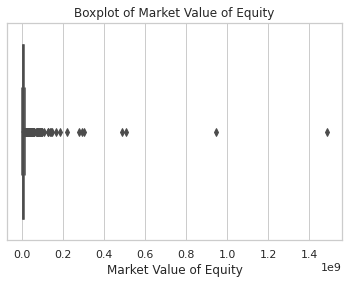

In [5]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Market Value of Equity']).set_title('Boxplot of Market Value of Equity')

Text(0.5, 1.0, 'Distribution of Market Value of Equity')

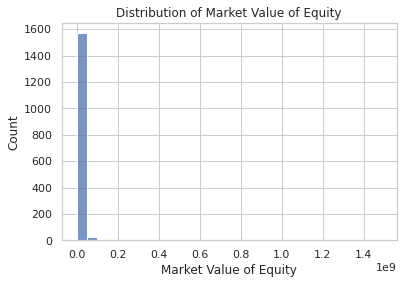

In [6]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Market Value of Equity'], x=df['Market Value of Equity'], bins=30).set_title('Distribution of Market Value of Equity')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

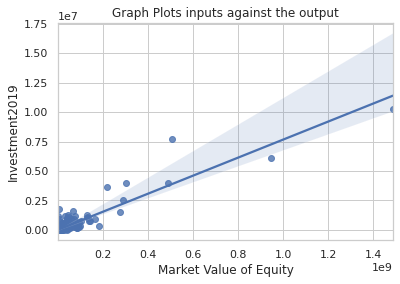

In [7]:
sns.regplot(data=df, x=df['Market Value of Equity'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [8]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
#indexNames = df[df['Market Value of Equity'] > 50000000].index
#df.drop(indexNames , inplace=True)

### Total Market Value

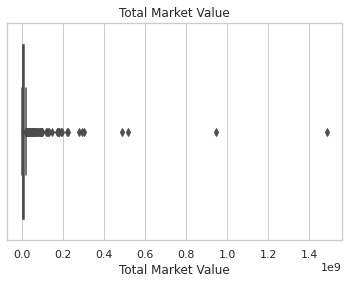

In [9]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Total Market Value']).set_title('Total Market Value')

Text(0.5, 1.0, 'Distribution of Total Market Value')

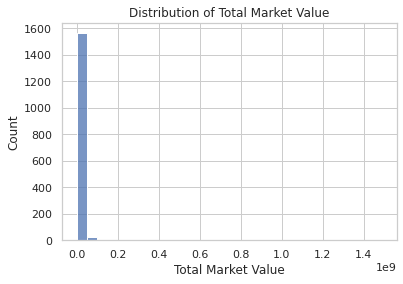

In [10]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Total Market Value'], x=df['Total Market Value'], bins=30).set_title('Distribution of Total Market Value')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

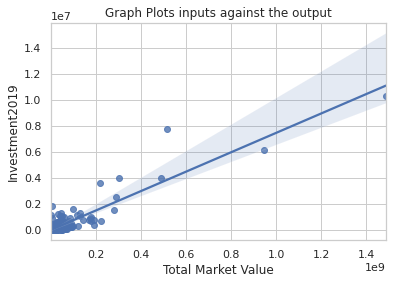

In [11]:
sns.regplot(data=df, x=df['Total Market Value'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [12]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
#indexNames = df[df['Total Market Value'] > 55000000].index
#df.drop(indexNames , inplace=True)

### Amortization and Depreciation

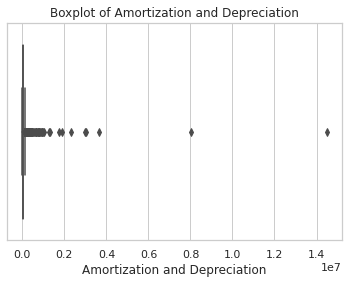

In [13]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Amortization and Depreciation']).set_title('Boxplot of Amortization and Depreciation')

Text(0.5, 1.0, 'Distribution of Amortization and Depreciation')

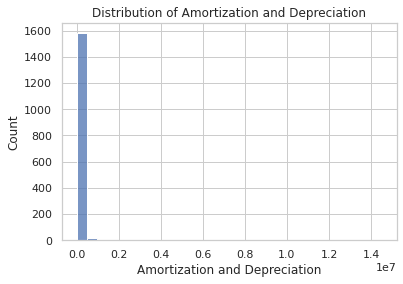

In [14]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Amortization and Depreciation'], x=df['Amortization and Depreciation'], bins=30).set_title('Distribution of Amortization and Depreciation')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

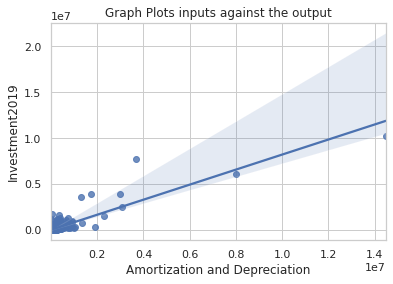

In [15]:
sns.regplot(data=df, x=df['Amortization and Depreciation'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [16]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
#indexNames = df[df['Amortization and Depreciation'] > 330000].index
#df.drop(indexNames , inplace=True)

### Book Value

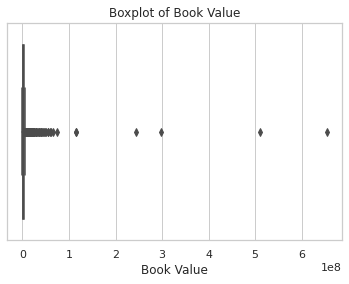

In [17]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Book Value']).set_title('Boxplot of Book Value')

Text(0.5, 1.0, 'Distribution of Book Value')

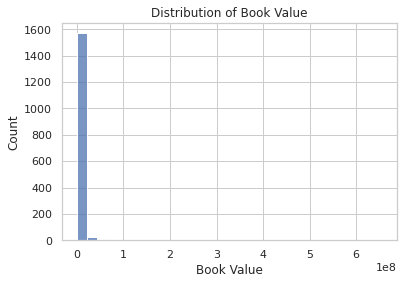

In [18]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Book Value'], x=df['Book Value'], bins=30).set_title('Distribution of Book Value')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

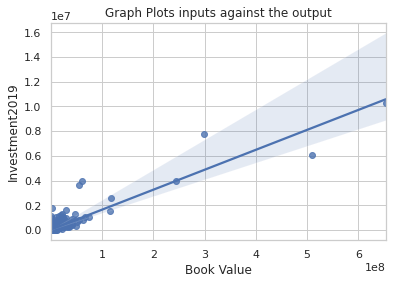

In [19]:
sns.regplot(data=df, x=df['Book Value'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [20]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
#indexNames = df[df['Book Value'] > 20000000].index
#df.drop(indexNames , inplace=True)

### Operating Income after Depreciation

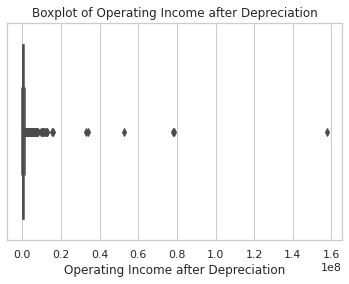

In [21]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Operating Income after Depreciation']).set_title('Boxplot of Operating Income after Depreciation')

Text(0.5, 1.0, 'Distribution of Operating Income after Depreciation')

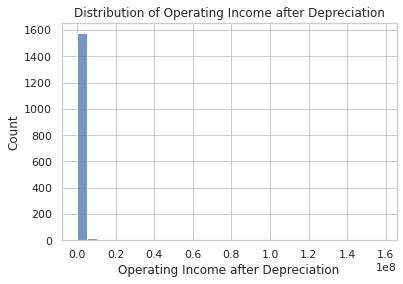

In [22]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Operating Income after Depreciation'], x=df['Operating Income after Depreciation'], bins=30).set_title('Distribution of Operating Income after Depreciation')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

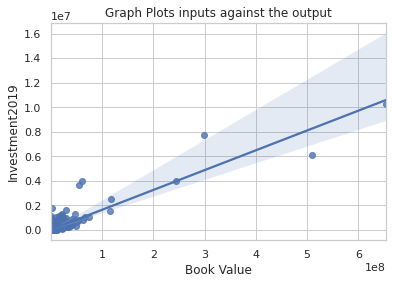

In [23]:
sns.regplot(data=df, x=df['Book Value'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [24]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
#indexNames = df[df['Operating Income after Depreciation'] > 3000000].index
#df.drop(indexNames , inplace=True)

### Annual Dividends

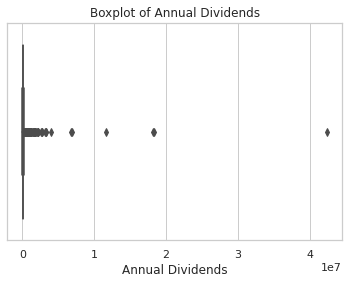

In [25]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Annual Dividends']).set_title('Boxplot of Annual Dividends')

Text(0.5, 1.0, 'Distribution of Annual Dividends')

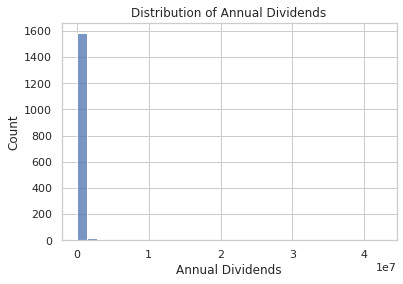

In [26]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Annual Dividends'], x=df['Annual Dividends'], bins=30).set_title('Distribution of Annual Dividends')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

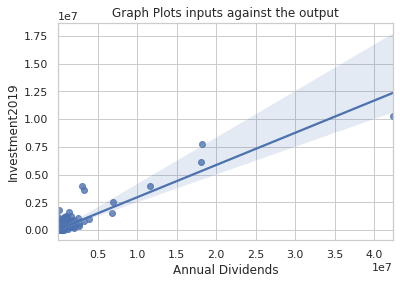

In [27]:
sns.regplot(data=df, x=df['Annual Dividends'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [28]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
#indexNames = df[df['Annual Dividends'] > 700000].index
#df.drop(indexNames , inplace=True)

### Leverage 

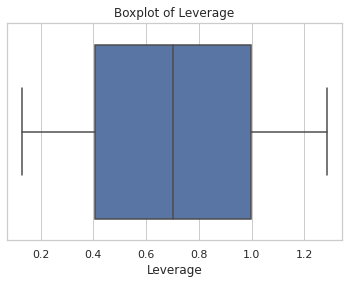

In [29]:
# Rename leverage column so it doesn't have a space after it
df.rename(columns={"Leverage ": "Leverage"}, inplace=True)

#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Leverage']).set_title('Boxplot of Leverage')

Text(0.5, 1.0, 'Distribution of Leverage')

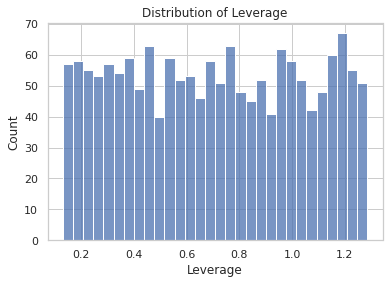

In [30]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Leverage'], x=df['Leverage'], bins=30).set_title('Distribution of Leverage')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

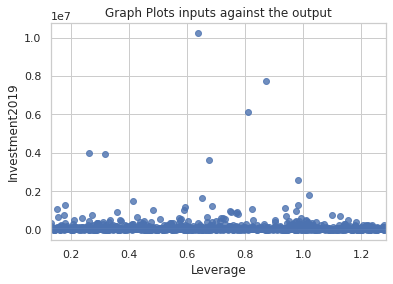

In [31]:
sns.regplot(data=df, x=df['Leverage'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

### Cash

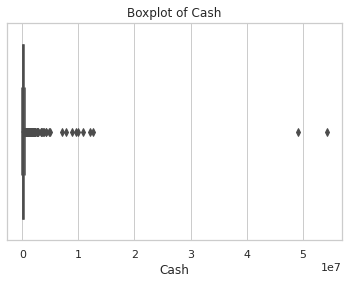

In [32]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Cash']).set_title('Boxplot of Cash')

Text(0.5, 1.0, 'Distribution of Cash')

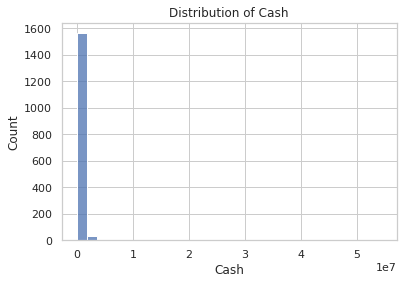

In [33]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Cash'], x=df['Cash'], bins=30).set_title('Distribution of Cash')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

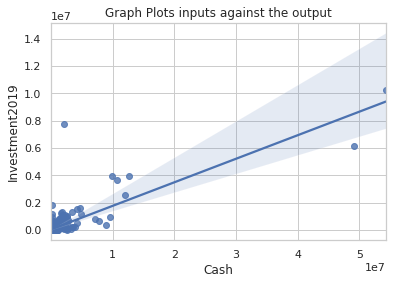

In [34]:
sns.regplot(data=df, x=df['Cash'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [35]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
indexNames = df[df['Cash'] > 40000000].index
len(indexNames)
#df.drop(indexNames , inplace=True)

2

### Age

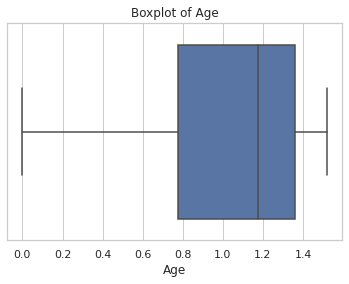

In [36]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Age']).set_title('Boxplot of Age')

Text(0.5, 1.0, 'Distribution of Age')

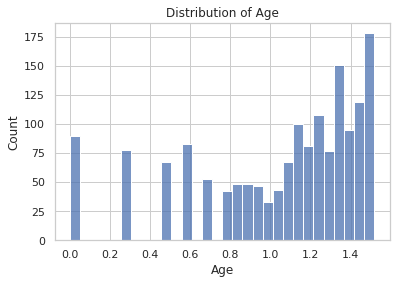

In [37]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Age'], x=df['Age'], bins=30).set_title('Distribution of Age')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

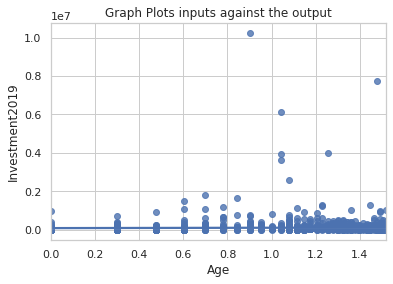

In [38]:
sns.regplot(data=df, x=df['Age'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [39]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
indexNames = df[df['Age'] == 0].index
len(indexNames)
#df.drop(indexNames , inplace=True)

90

### Size 

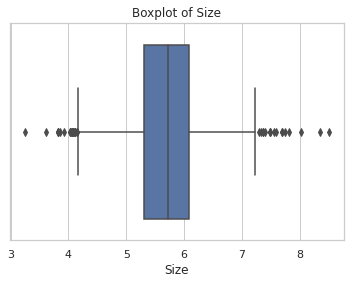

In [40]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Size']).set_title('Boxplot of Size')

Text(0.5, 1.0, 'Distribution of Size')

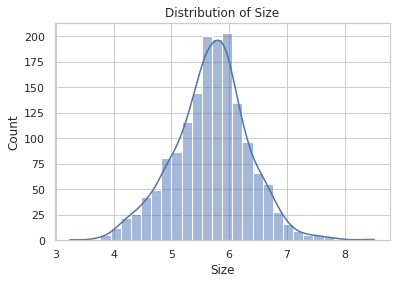

In [41]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Size'], x=df['Size'], bins=30, kde=True).set_title('Distribution of Size')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

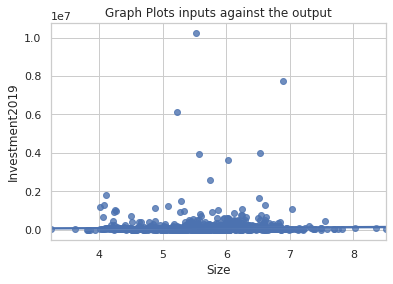

In [42]:
sns.regplot(data=df, x=df['Size'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

### Investment2019

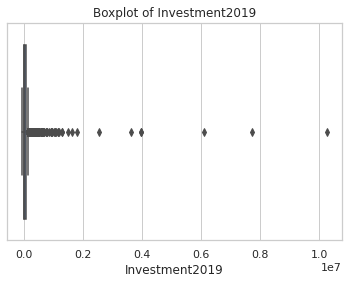

In [43]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Investment2019']).set_title('Boxplot of Investment2019')

Text(0.5, 1.0, 'Distribution of Investment2019')

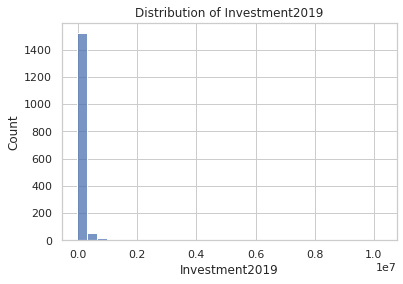

In [44]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Investment2019'], x=df['Investment2019'], bins=30).set_title('Distribution of Investment2019')

In [45]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
#indexNames = df[df['Investment2019'] > 500000].index
#df.drop(indexNames , inplace=True)

### Calculate Investment 2018 and V/P

In [46]:
# Calculate Investment 2018
df['Investment2018'] = df['Total Investment Expenditure'] - df['Amortization and Depreciation']

# Calculate V/P 
df['V/P'] = ((1-1.24*0.12)*df['Book Value']+1.24*1.12*df['Operating Income after Depreciation'] -1.24*0.12*df['Annual Dividends'])/ df['Market Value of Equity']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 1 to 3842
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Stock Code                           1608 non-null   int64  
 1   Market Value of Equity               1608 non-null   float64
 2   Total Market Value                   1608 non-null   float64
 3   Stock Return                         1608 non-null   float64
 4   Total Investment Expenditure         1608 non-null   float64
 5   Amortization and Depreciation        1608 non-null   float64
 6   Book Value                           1608 non-null   float64
 7   Operating Income after Depreciation  1608 non-null   float64
 8   Annual Dividends                     1608 non-null   float64
 9   Leverage                             1608 non-null   float64
 10  Cash                                 1608 non-null   float64
 11  Age                           

### Exploring Investment 2018 and V/P

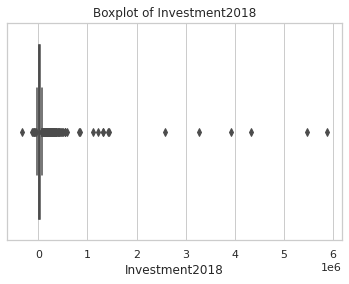

In [47]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Investment2018']).set_title('Boxplot of Investment2018')

Text(0.5, 1.0, 'Distribution of Investment2018')

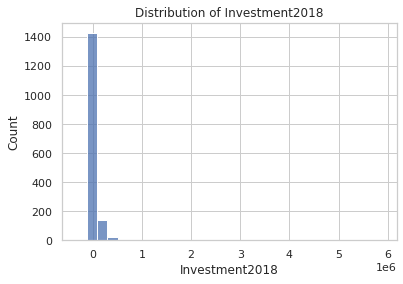

In [48]:
# Histogram with 30 Equal Frequency bins
sns.histplot(data=df['Investment2018'], x=df['Investment2018'], bins=30).set_title('Distribution of Investment2018')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

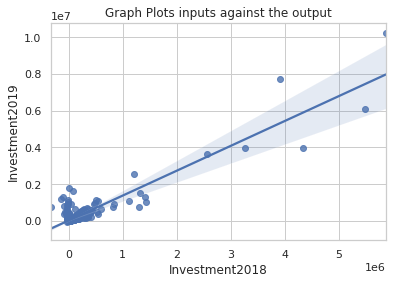

In [49]:
sns.regplot(data=df, x=df['Investment2018'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [50]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
indexNames = df[df['Investment2018'] > 4000000].index
len(indexNames)
#df.drop(indexNames, inplace=True)

3

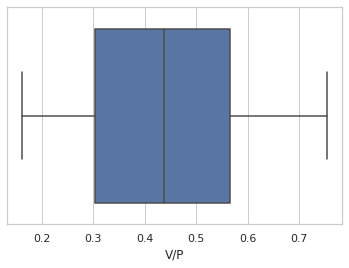

In [51]:
#Boxplots. 
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['V/P'])

Text(0.5, 1.0, 'Distribution of V/P')

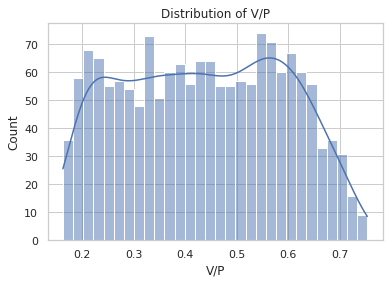

In [52]:
# Histogram
sns.histplot(data=df['V/P'], x=df['V/P'], kde=True, bins=30).set_title('Distribution of V/P')

Text(0.5, 1.0, 'Graph Plots inputs against the output')

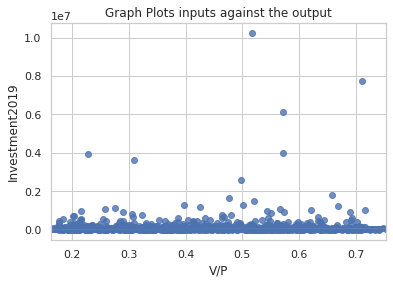

In [53]:
sns.regplot(data=df, x=df['V/P'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

### Difference Between 2018/19 Investments

Text(0.5, 1.0, 'Distribution of Difference')

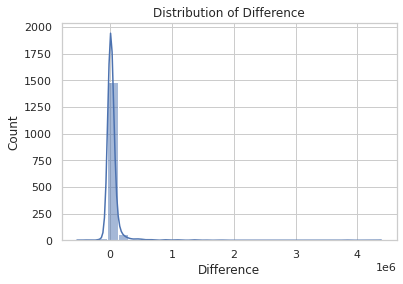

In [54]:
df['Difference'] = df['Investment2019'] - df['Investment2018']
sns.histplot(data=df['Difference'], x=df['Difference'], kde=True, bins=30).set_title('Distribution of Difference')

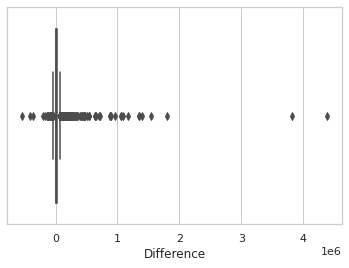

In [55]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Difference'])

Text(0.5, 1.0, 'Graph Plots inputs against the output')

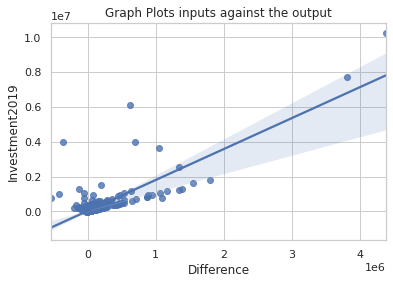

In [56]:
sns.regplot(data=df, x=df['Difference'], y=df['Investment2019']).set_title('Graph Plots inputs against the output')

In [57]:
# Removing the extreme values of this feature, as these values could have a large impact on the trend. 
# Re run the above two cells to see the difference in the graphs.
indexNames = df[df['Difference'] > 1000000].index
len(indexNames)
df.drop(indexNames, inplace=True)

### After the Dataset has now been cleaned and preprocessed, df exported to samples_for_regression.csv

In [58]:
df.to_csv('samples_for_regression.csv', index=False)

### Training the Reggression Model

r2 score for the  0  fold:  0.8960258197240516


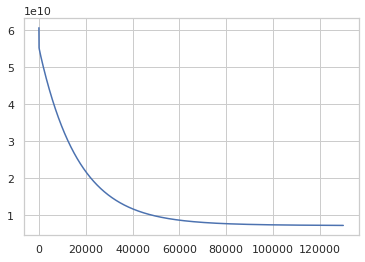

r2 score for the  1  fold:  0.6874413388129309


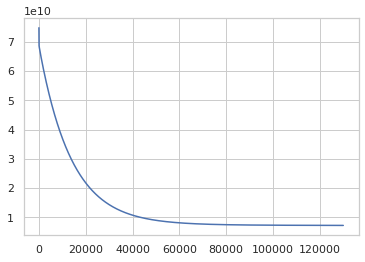

r2 score for the  2  fold:  0.45104051009559687


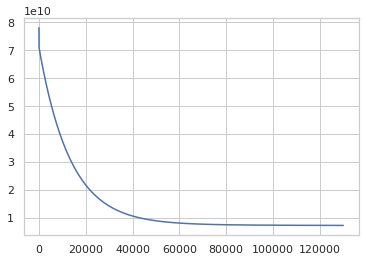

r2 score for the  3  fold:  0.9669216673831988


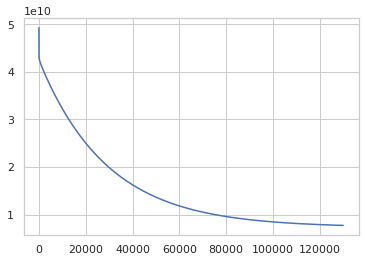

r2 score for the  4  fold:  0.8168832024584448


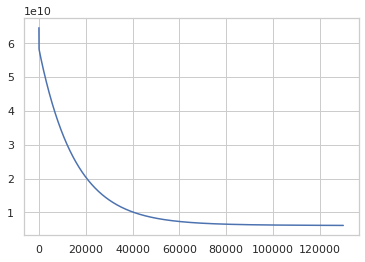

 
MEAN R2 SCORE  0.7636625076948446
MEAN ADJUSTED R2 0.7625778221151592
 
BEST MODEL R2:  0.9669216673831988
BEST MODEL ADJUSTED R2:  0.9667698523239819
 
BEST MODEL:  [-2.87323072e+04 -1.36131979e+03 -7.55159741e+03  1.88607298e+06
  2.71697545e+04 -3.99549887e+04  4.12643355e+02  4.39356612e+06]


In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score
import matplotlib

# 'Weights'

# Learning Rate
alpha = 0.007

# Normalise the Indipendant variables
vp_scaler = MinMaxScaler()
leverage_scaler = MinMaxScaler()
cash_scaler = MinMaxScaler()
age_scaler = MinMaxScaler()
size_scaler = MinMaxScaler()
stock_returns_scaler = MinMaxScaler()
investment_scaler = MinMaxScaler()

vp = df['V/P'].values.reshape(-1,1)
leverage = df['Leverage'].values.reshape(-1,1)
cash = df['Cash'].values.reshape(-1,1)
age = df['Age'].values.reshape(-1,1)
size = df['Size'].values.reshape(-1,1)
stock_return = df['Stock Return'].values.reshape(-1,1)
investment2018 = df['Investment2018'].values.reshape(-1,1)

norm_vp = vp_scaler.fit_transform(vp).reshape(-1)
norm_leverage = leverage_scaler.fit_transform(leverage).reshape(-1)
norm_cash = cash_scaler.fit_transform(cash).reshape(-1)
norm_age = age_scaler.fit_transform(age).reshape(-1)
norm_size = size_scaler.fit_transform(size).reshape(-1)
norm_stock_return = stock_returns_scaler.fit_transform(stock_return).reshape(-1)
norm_investment2018 = investment_scaler.fit_transform(investment2018).reshape(-1)

# Indipendant and dependant variables
x = np.array([np.full(len(norm_size), 1), norm_vp, norm_leverage, norm_cash, norm_age, norm_size, norm_stock_return, norm_investment2018]).T
y = np.array(df['Investment2019'])

loss_history = []

# the linear model ax+b
def h(x, parameters):
    # this is a column wise sum
    return np.sum(parameters*x, axis=1)

# calculate the gradiant value for 'a'
def gradient(x,y_hat,y):
    return -2/len(y)*np.sum(x*(y-y_hat).reshape((y-y_hat).shape[0],1), axis=0)

# mse loss
def loss(y_hat, y):
    return np.sum(np.square(y-y_hat))/len(y)

# Calculate adjusted r2
def adjr2(r2, n, k):
    return 1-(1-r2)*((n-1)/(n-(k+1)))

kf = KFold(n_splits=5)
r2_scores = []
counter = 0
models = []

# Training loop including splitting up data into folds
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    loss_history = []
    model = [1 for x in range(0, 8)]
    
    # Train the fold
    for i in range(0,130000):
        # Calculate the y from x
        y_hat = h(x_train, model)
        
        # Update whole parameter list using latest gradients
        model = model-alpha*gradient(x_train,y_hat, y_train)
        loss_history += [loss(y_hat,y_train)]
    
    # Test your model using x_test and y_test to calculate r2 scores
    r2_scores += [r2_score(y_test, h(x_test, model))]
    print('r2 score for the ', counter, ' fold: ', r2_score(y_test, h(x_test, model)))
    counter += 1
    models.append(model)
    plt.plot(loss_history)
    plt.show()
    
# Picking the best model based on the r2 scores
model = models[r2_scores.index(max(r2_scores))]
best_r2 = max(r2_scores)
print(' ')
print('MEAN R2 SCORE ', np.mean(r2_scores))
print('MEAN ADJUSTED R2', adjr2(np.mean(r2_scores), len(df)-319 / 5, 7))
print(' ')
print("BEST MODEL R2: ", max(r2_scores))
print("BEST MODEL ADJUSTED R2: ", adjr2(max(r2_scores), len(df)-319 / 5, 7))
print(' ')
print("BEST MODEL: ", model)

### Calculate Expected Investment 2019 and Overinvestment on Adapted Dataset

In [60]:
df2 = df
model = np.array(model)

# Calculate Expected Investment 2019
df2['Expected Investment2019'] = np.sum(model*x, axis=1)

# Calculate Overinvestment 2019
df2['Overinvestment2019'] = df2['Investment2019'] - df2['Expected Investment2019']
df2.head(10)

,Stock Code,Market Value of Equity,Total Market Value,Stock Return,Total Investment Expenditure,Amortization and Depreciation,Book Value,Operating Income after Depreciation,Annual Dividends,Leverage,Cash,Age,Size,Investment2019,Investment2018,V/P,Difference,Expected Investment2019,Overinvestment2019
1,900956,153180.00,313020.00,0.073942,1945.386000,1282.882500,75058.2000,12609.777600,3366.810619,0.75709,2983.080600,0.000000,7.485703,426.652254,662.503500,0.528143,-235.851246,-3072.627465,3499.279719
3,900933,1526013.44,1526013.44,0.071170,24721.417730,14497.127680,656185.7792,131237.155800,26247.431170,0.43887,83686.577050,0.477121,6.549982,14590.061900,10224.290050,0.482893,4365.771850,25410.896971,-10820.835071
10,900953,114720.00,305920.00,0.064595,1300.160000,1132.860000,26385.6000,6306.158400,1690.050451,0.46263,7210.534400,0.477121,5.952080,257.642000,167.300000,0.269926,90.342000,19388.332119,-19130.690119
13,900951,35000.00,96250.00,-0.035813,500.500000,319.375000,5600.0000,1430.800000,283.298400,1.01519,1785.437500,1.380211,5.573848,380.724750,181.125000,0.191762,199.599750,34765.631221,-34384.906471
14,900922,31516.53,31516.53,0.031948,485.354562,185.159614,5042.6448,950.538545,182.503401,1.27798,820.690441,1.079181,5.700600,385.750509,300.194948,0.177217,85.555560,26801.205585,-26415.455077
17,900915,52348.23,52348.23,0.036365,671.802285,451.503484,9946.1637,2466.648598,443.996748,0.31150,1784.551161,0.301030,3.821806,222.501789,220.298801,0.225906,2.202988,33315.898400,-33093.396611
23,900916,76876.80,76876.80,0.054118,877.676800,768.768000,37669.6320,8324.988672,1923.072383,1.24443,2168.694528,0.000000,3.848742,132.868736,108.908800,0.563759,23.959936,20772.263158,-20639.394422
24,900948,1075680.00,2635745.67,0.123440,14306.544000,5781.780000,344217.6000,92594.534400,21018.959310,1.21972,147127.323300,1.255273,5.825846,5268.304152,8524.764000,0.389024,-3256.459848,41034.483846,-35766.179694
25,900924,111726.24,111726.24,0.082741,703.875312,837.946800,42455.9712,9340.313664,1419.727677,0.56262,4091.414909,1.431364,5.640000,1953.088251,-134.071488,0.437669,2087.159739,37433.363073,-35480.274822
26,900947,642297.43,642297.43,0.061093,4688.771239,5620.102513,250495.9977,41582.335620,6237.350343,0.50615,18774.353880,1.204120,5.090000,28048.317720,-931.331274,0.420434,28979.648994,37877.890754,-9829.573034


### Calculate Expected Investment 2019 and Overinvestment on Origonal Dataset

In [61]:
# Recalculate vp and investment 2018
orig['Investment2018'] = orig['Total Investment Expenditure'] - orig['Amortization and Depreciation']
orig['V/P'] = ((1-1.24*0.12)*orig['Book Value']+1.24*1.12*orig['Operating Income after Depreciation'] -1.24*0.12*orig['Annual Dividends'])/ orig['Market Value of Equity']

# Normalise the Indipendant variables
vp = orig['V/P'].values.reshape(-1,1)
leverage = orig['Leverage '].values.reshape(-1,1)
cash = orig['Cash'].values.reshape(-1,1)
age = orig['Age'].values.reshape(-1,1)
size = orig['Size'].values.reshape(-1,1)
stock_return = orig['Stock Return'].values.reshape(-1,1)
investment2018 = orig['Investment2018'].values.reshape(-1,1)

norm_vp = vp_scaler.fit_transform(vp).reshape(-1)
norm_leverage = leverage_scaler.fit_transform(leverage).reshape(-1)
norm_cash = cash_scaler.fit_transform(cash).reshape(-1)
norm_age = age_scaler.fit_transform(age).reshape(-1)
norm_size = size_scaler.fit_transform(size).reshape(-1)
norm_stock_return = stock_returns_scaler.fit_transform(stock_return).reshape(-1)
norm_investment2018 = investment_scaler.fit_transform(investment2018).reshape(-1)

# X and Y
x = np.array([np.full(len(norm_size), 1), norm_vp, norm_leverage, norm_cash, norm_age, norm_size, norm_stock_return, norm_investment2018]).T
y = np.array(orig['Investment2019'])

# Calculate Expected Investment 2019
orig['Expected Investment2019'] = np.sum(model*x, axis=1)

# Calculate Overinvestment 2019
orig['Overinvestment2019'] = orig['Investment2019'] - orig['Expected Investment2019']

### Expected vs Actual Error Plot

Text(0.5, 1.0, 'Expected vs Actual')

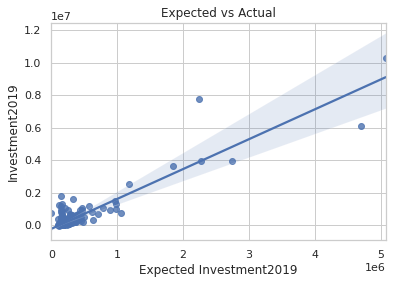

In [62]:
sns.regplot(data=orig, x=orig['Expected Investment2019'], y=orig['Investment2019']).set_title('Expected vs Actual')

### Make the Overinvestment CSV

In [63]:
df3 = orig.filter(['Stock Code','Overinvestment2019'], axis=1)
df3.head()

# Save The Overinvestment Dataset. 
df3.to_csv('overinvestment_2019.csv', index=False)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 0 to 3844
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Stock Code          3845 non-null   int64  
 1   Overinvestment2019  1608 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 90.1 KB
